In [1]:
# %matplotlib inline
# for interactive

In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
%cat 0Source_Citation.txt

Source and citation

- This notebook is a part of the `pytheos` package.
- Website: http://github.com/SHDShim/pytheos.
- How to cite: S.-H. Shim (2017) Pytheos - a python tool set for equations of state. DOI: 10.5281/zenodo.802392


For high dpi displays.

# 0. General note

- This notebook shows how to propagate uncertainties to obtain reasonable error bars for pressure.
- We use MgO as an example.

# 1. General setup

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import uncertainties as uct
from uncertainties import unumpy as unp
import pandas as pd
import pytheos as eos

# 2. Assign uncertainties to the EOS parameters

Uncertainties of parameters can be defined using the `uncertainties` package.  The parameter values used in this example are just for demonstration purpose.  For more accurate values, please refer to the recent literature.

In [5]:
v0 = uct.ufloat(74.698, 0.004)
k0 = uct.ufloat(160., 3.)
k0p = uct.ufloat(4.0, 0.3)

We make a `numpy` array for volume at high pressure.

In [6]:
n_pts = 20 
vv0 = np.linspace(1.,0.8, n_pts)
v = vv0 * v0

Calculate pressure from `pytheos`.

In [7]:
p = eos.bm3_p(v, v0, k0, k0p)

### How to get help

You may get help by using `help(function_name)`.

In [8]:
help(eos.bm3_p)

Help on function bm3_p in module pytheos.eqn_bm3:

bm3_p(v, v0, k0, k0p, p_ref=0.0)
    calculate pressure from 3rd order Birch-Murnathan equation

    :param v: volume at different pressures
    :param v0: volume at reference conditions
    :param k0: bulk modulus at reference conditions
    :param k0p: pressure derivative of bulk modulus at different conditions
    :param p_ref: reference pressure (default = 0)
    :return: pressure



Now you can see that error bars for the EOS parameters are used in error propagation calculation for pressure value.  Note that the uncertainties in the EOS parameters are correctly applied for propagating uncertainties to both molar volume and pressure.

We use `pandas` to organize the data more effectively.  It also presents nice looking tables.

In [9]:
df = pd.DataFrame()
df['unit-cell volume'] = v
df['pressure'] = p
df
#print(df.to_string(index=False)) # for fancier print

,unit-cell volume,pressure
0,74.698+/-0.004,0.0+/-0
1,73.912+/-0.004,1.729+/-0.033
2,73.125+/-0.004,3.55+/-0.07
3,72.339+/-0.004,5.47+/-0.11
4,71.553+/-0.004,7.50+/-0.15
5,70.767+/-0.004,9.64+/-0.20
6,69.980+/-0.004,11.89+/-0.25
7,69.194+/-0.004,14.27+/-0.32
8,68.408+/-0.004,16.8+/-0.4
9,67.621+/-0.004,19.4+/-0.5


Unfortunately to plot with `matplotlib`, you need to separate nominal values from standard deviation.

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
/var/folders/hq/thm59xl964s5d51mg8d1jt1m0000gp/T/ipykernel_39955/1021257366.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Pressure (GPa)'); plt.ylabel('Unit-cell volume ($\mathrm{\AA}^3$)');


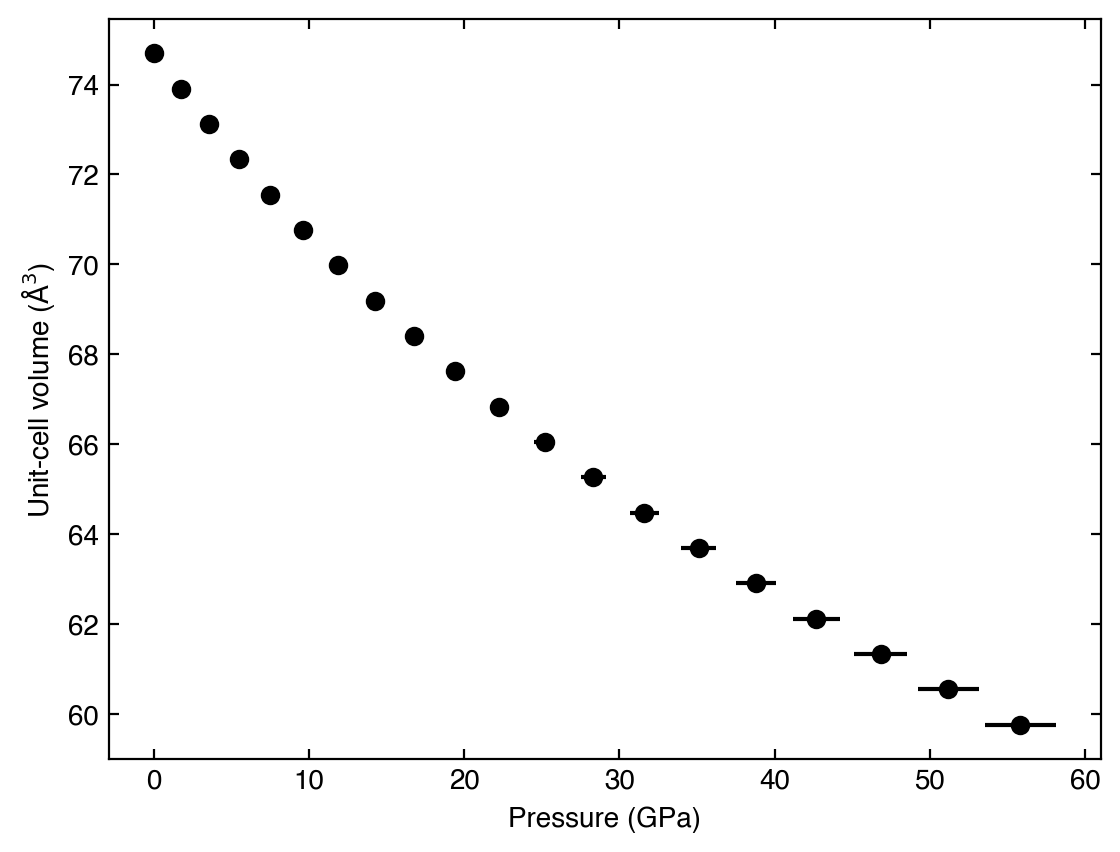

In [10]:
f = plt.figure()
plt.errorbar(unp.nominal_values(p), unp.nominal_values(v), fmt='ko', \
             xerr=unp.std_devs(p), yerr=unp.std_devs(v))
plt.xlabel('Pressure (GPa)'); plt.ylabel('Unit-cell volume ($\mathrm{\AA}^3$)');

# 3. Calculate volume from pressure using pytheos

`Pytheos` provides functions to calculate volumes at given pressures with error propagation.

In [11]:
v_cal = eos.bm3_v(p, v0, k0, k0p)

In [12]:
df = pd.DataFrame()
df['pressure'] = p
df['unit-cell volume'] = v_cal
df
# print(df.to_string(index=False))

,pressure,unit-cell volume
0,0.0+/-0,74.698+/-0.004
1,1.729+/-0.033,73.912+/-0.004
2,3.55+/-0.07,73.125+/-0.004
3,5.47+/-0.11,72.339+/-0.004
4,7.50+/-0.15,71.553+/-0.004
5,9.64+/-0.20,70.767+/-0.004
6,11.89+/-0.25,69.980+/-0.004
7,14.27+/-0.32,69.194+/-0.004
8,16.8+/-0.4,68.408+/-0.004
9,19.4+/-0.5,67.621+/-0.004


Compare this table with the one we showed above for accuracy check.

# 4. Bulk modulus at high pressure

You can also propagate uncertainties in bulk modulus calculation.

In [13]:
k = eos.bm3_k(p, v0, k0, k0p)

In [14]:
df = pd.DataFrame()
df['pressure'] = p
df['bulk modulus'] = k
df
#print(df.to_string(index=False))

,pressure,bulk modulus
0,0.0+/-0,160.0+/-3.0
1,1.729+/-0.033,166.9+/-3.2
2,3.55+/-0.07,174.1+/-3.4
3,5.47+/-0.11,182+/-4
4,7.50+/-0.15,189+/-4
5,9.64+/-0.20,198+/-5
6,11.89+/-0.25,206+/-6
7,14.27+/-0.32,215+/-6
8,16.8+/-0.4,224+/-7
9,19.4+/-0.5,234+/-8


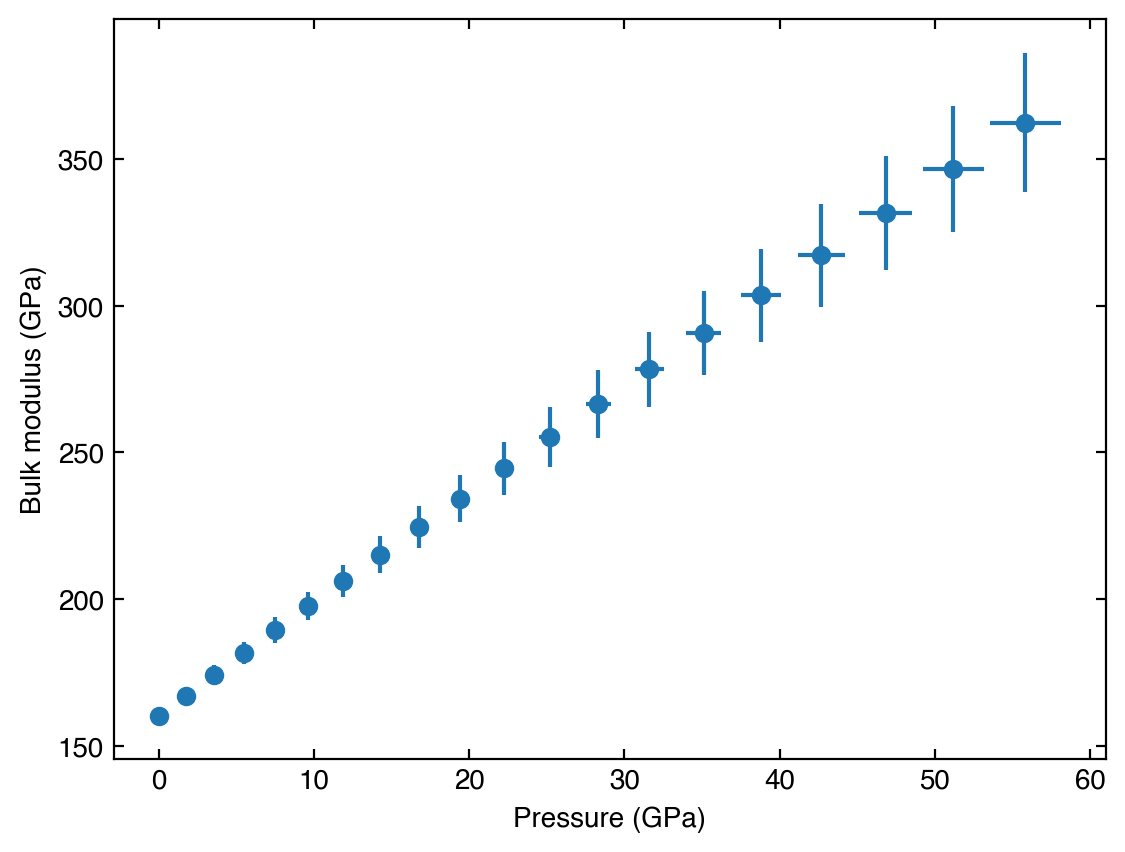

In [15]:
f = plt.figure()
plt.errorbar( unp.nominal_values(p), unp.nominal_values(k), \
             xerr=unp.std_devs(p), yerr=unp.std_devs(k), fmt='o')
plt.xlabel('Pressure (GPa)'); plt.ylabel('Bulk modulus (GPa)');

# 5. High temperature equation of state

The constant $q$ assumption has been used widely for the thermal part of the mantle phases.  Below, we assign uncertainties to the thermal parameters of MgO.

In [16]:
gamma0 = uct.ufloat(1.45, 0.02)
q = uct.ufloat(0.8, 0.3)
theta0 = uct.ufloat(800., 0.)

/opt/homebrew/Caskroom/miniforge/base/envs/pytheos-dev/lib/python3.12/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


We will use `constq_pth` for calculating the thermal pressure part of the EOS.  Below, I demonstrate how to get help for the function.

In [17]:
help(eos.constq_pth)

Help on function constq_pth in module pytheos.eqn_therm_constq:

constq_pth(v, temp, v0, gamma0, q, theta0, n, z, t_ref=300.0, three_r=24.94338785445972)
    calculate thermal pressure for constant q

    :param v: unit-cell volume in A^3
    :param temp: temperature
    :param v0: unit-cell volume in A^3 at 1 bar
    :param gamma0: Gruneisen parameter at 1 bar
    :param q: logarithmic derivative of Gruneisen parameter
    :param theta0: Debye temperature in K
    :param n: number of atoms in a formula unit
    :param z: number of formula unit in a unit cell
    :param t_ref: reference temperature
    :param three_r: 3R in case adjustment is needed
    :return: thermal pressure in GPa



We calculate total pressure at 2000 K below.  `eos.constq_pth` requires input of volume and temperature with the same number of elements.  For 2000-K isotherm, we generate a temperature array with 2000 for all elements.

In [18]:
p_hT = eos.bm3_p(v, v0, k0, k0p) + \
    eos.constq_pth(v, np.ones_like(v)*2000., v0, gamma0, q, theta0, 2, 4)

In [19]:
df = pd.DataFrame()
df['unit-cell volume'] = v
df['pressure@300K'] = p
df['pressure@2000K'] = p_hT
df
# print(df.to_string(index=False))

,unit-cell volume,pressure@300K,pressure@2000K
0,74.698+/-0.004,0.0+/-0,10.40+/-0.14
1,73.912+/-0.004,1.729+/-0.033,12.14+/-0.15
2,73.125+/-0.004,3.55+/-0.07,13.97+/-0.17
3,72.339+/-0.004,5.47+/-0.11,15.90+/-0.20
4,71.553+/-0.004,7.50+/-0.15,17.93+/-0.25
5,70.767+/-0.004,9.64+/-0.20,20.07+/-0.30
6,69.980+/-0.004,11.89+/-0.25,22.34+/-0.35
7,69.194+/-0.004,14.27+/-0.32,24.7+/-0.4
8,68.408+/-0.004,16.8+/-0.4,27.2+/-0.5
9,67.621+/-0.004,19.4+/-0.5,29.9+/-0.6
